# Basics of Machine Learning with Python

## Agenda:
1. Linear & non-linear Regression
2. Logistic Regression
3. Decision Tree & Random Forest
4. Feature Extraction & Engineering for higher dimensional data
5. Word2Vec
6. Training & Evaluation


# Linear & Non Linear Regression
Used for modeling relationship between a dependent variable and independent variable(s)

Linear regression is practically the most widely used. coz most variables are linearly dependent 

or can be approx. to a linear dependency (piecewise linear functions)

### Let us consider a very simple example

In [1]:
from numpy import *
from scipy.interpolate import *
from matplotlib.pyplot import *

In [2]:
x = array([0,1,2,3,4,5])
y = array([0,0.8,0.9,0.1,-0.8,-1])

In [3]:
print(x)

[0 1 2 3 4 5]


In [4]:
print(y)

[ 0.   0.8  0.9  0.1 -0.8 -1. ]


In [5]:
p1 = polyfit(x,y,1)

In [6]:
print(p1)

[-0.30285714  0.75714286]


In [8]:
%matplotlib inline

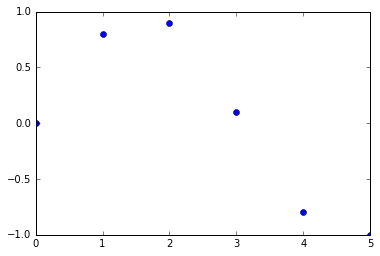

In [9]:
plot(x,y,'o')

In [10]:
p2= polyfit(x,y,2)
p3 = polyfit(x,y,3)

In [11]:
print(p1)
print(p2)
print(p3)

[-0.30285714  0.75714286]
[-0.16071429  0.50071429  0.22142857]
[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


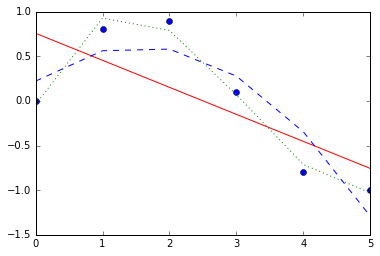

In [12]:
plot(x,y,'o')
plot(x,polyval(p1,x), 'r-')
plot(x,polyval(p2,x), 'b--')
plot(x,polyval(p3,x), 'g:')

but... but... it doesn't look like a quadratic or cubic distribution!!!...

that is coz of the increment value.. high increment value = poor approximation of the curve.. 

which in this case is +1

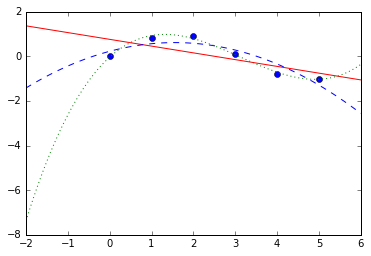

In [13]:
plot(x,y,'o')
xp = linspace(-2,6,100) ##linear or equal spacing between numbers..linspace(2,3,5) would yield (2,2.25,2.50,2.75,3)
plot(xp,polyval(p1,xp), 'r-')
plot(xp,polyval(p2,xp), 'b--')
plot(xp,polyval(p3,xp), 'g:')

In [15]:
## Another important parameter is the R^2 Value. Helps in understanding ...(assignment)
##manual way
yfit = p1[0] * x + p1[1]
print(yfit)
print(y)
yresid = y - yfit
sumsqres= sum(pow(yresid,2))
ss = len(y) * var(y)
r2 = 1 - (sumsqres/ss)
print(r2)

[ 0.75714286  0.45428571  0.15142857 -0.15142857 -0.45428571 -0.75714286]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]
0.517788018433


In [16]:
## or go for the built in function
from scipy.stats import *
slope,intercept,r_value,p_value,std_err = linregress(x,y)
print(pow(r_value,2))

0.517788018433


concept of R2 is very important..

R^2 is not a measure of how well it is able to predict the y value.

People get confused that r^2 is something like accuracy.. Nope.. it is not..

#### -----------------------------------------------------------------------------------
### Logistic Regression
#### Behold.. You have entered the realm of classifiers

In [14]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [15]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv", error_bad_lines=False)

In [16]:
print (df.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [17]:
df.columns = ["admit", "gre", "gpa", "prestige"]

In [18]:
print (df.columns)

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [19]:
print (df.describe())

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [20]:
print (df.std())

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [21]:
print (pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


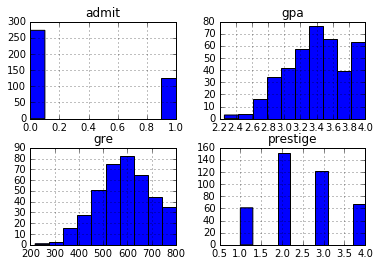

In [22]:
df.hist()
pl.show()

Creation of dummy variables... Must do when we have mutually exclusive variables in play to simplify calculation

In [23]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [24]:
print (dummy_ranks.head())

   prestige_1  prestige_2  prestige_3  prestige_4
0         0.0         0.0         1.0         0.0
1         0.0         0.0         1.0         0.0
2         1.0         0.0         0.0         0.0
3         0.0         0.0         0.0         1.0
4         0.0         0.0         0.0         1.0


In [25]:
cols_to_keep = ['admit', 'gre', 'gpa']

In [26]:
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

You might notice i have skipped Prestige_1 dummy variable.. Any idea why?

A concept called **dummy variable trap due to multicollinearity**

If it is encountered the model fails.. to avoid this, prestige_1 is taken as reference or baseline variable

i have randomly taken prestige_1 as reference variable, you can take any of the 4 as reference variable

In [27]:
print (data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61         0.0         1.0         0.0
1      1  660  3.67         0.0         1.0         0.0
2      1  800  4.00         0.0         0.0         0.0
3      1  640  3.19         0.0         0.0         1.0
4      0  520  2.93         0.0         0.0         1.0


In [28]:
data['intercept'] = 1.0

In [29]:
train_cols = data.columns[1:]
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [30]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Jun 2017   Pseudo R-squ.:                 0.08292
Time:                        15:51:23   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [31]:
print (np.exp(result.params))

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64


## Tree Based Classifiers 
### They are similar to how our thought process works when purchasing something... 
Decision Tree - Weak Classifier

Random Forest - Ensemble Method or strong classifier or combination of multiple decision trees

In [32]:
import pydot
import os
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [33]:
df2 = pd.read_csv("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv")

In [34]:
print(df2.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [35]:
print(df2.tail())

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica


predict name of the flower based on its features here it is **SepalLength**, **SepalWidth**, **PetalLength** & **PetalWidth**

In [36]:
print(df2["Name"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [37]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)

In [38]:
df3, targets = encode_target(df2, "Name")
print(df3[["Target", "Name"]].head())
print(df3[["Target", "Name"]].tail())
print(targets)

   Target         Name
0       0  Iris-setosa
1       0  Iris-setosa
2       0  Iris-setosa
3       0  Iris-setosa
4       0  Iris-setosa
     Target            Name
145       2  Iris-virginica
146       2  Iris-virginica
147       2  Iris-virginica
148       2  Iris-virginica
149       2  Iris-virginica
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [39]:
features = list(df3.columns[:4])

In [40]:
print(features)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


In [41]:
y = df3["Target"]
X = df3[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [42]:
import pydot
from subprocess import check_call
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,feature_names=feature_names)

In [44]:
visualize_tree(dt, features) #please look into the location the file is saved for seeing the output
visualize_tree

<function __main__.visualize_tree>

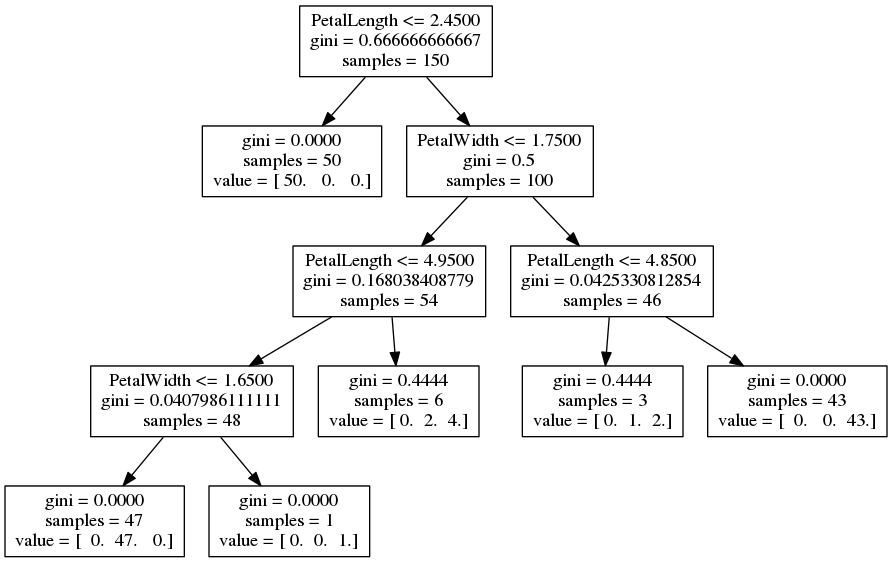

In [54]:
from IPython.display import Image
Image(filename=r"decision tree.png")

### Random Forest
### Falls under the category of algorithms that can be used for both classification & Regression problems

**Ensemble learning** involves combining several other weak classifiers and form a single predictor/classifier
that can do the job much better. It is easy to implement and does not have that many tuning parameters
like the SVM. 

So in terms of model complexity it is somewhere between bagging, boosting and more complex
Algorithm like SVM

In [46]:
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,14,0,0
versicolor,0,14,1
virginica,0,0,7


#### Curious case of random numbers popping up each time u run it!!!
#### well thats coz we have given random uniform function to randomize number 
#### of data selection
Above table representation is called as the **confusion matrix** using which we derive important metrics like 
Accuracy, sensitivity, specificity to understand our model performance

another interesting feature in RF is the variable importance.. 

A very useful feature in any classification problem

In [47]:
instance = iris.data[100:101]

In [48]:
print (instance)
print (clf.predict_proba(instance))

[[ 6.3  3.3  6.   2.5]]
[[ 0.  0.  1.]]


In [49]:
prediction, biases, contributions = ti.predict(clf, instance)
print ("Prediction", prediction)
print ("Feature contributions:")
for c, feature in zip(contributions[0], iris.feature_names):
    print (feature, c)

('Prediction', array([[ 0.,  0.,  1.]]))
Feature contributions:
('sepal length (cm)', array([-0.02522523, -0.00041024,  0.02563547]))
('sepal width (cm)', array([ 0.       ,  0.0039916, -0.0039916]))
('petal length (cm)', array([-0.08947368, -0.15474975,  0.24422343]))
('petal width (cm)', array([-0.19933618, -0.16111231,  0.36044849]))


From this we can clearly say that **Petal Length** & **Petal Width** played a major role in predicting the class
of the flower to class 3

## Working with Text Data
We don't always encounter numeric data. But at times we also have to implement Machine learning algorithms in text data.

This is where it gets interesting.... In normal data like the iris dataset, we had features...

Specific features which can be used for classification. But in text data we dont have such features given..

What do we do in such case?? well we build these features ourselves..

Say you want to classify/predict sentiments of tweets.. and you have been provided with 10,000 tweets..

How do you proceed?? well one way is to use the words in the sentence.. 

the presence or absence of the words can be used as a feature

That is precisely what we do in ***Term Document Matrix (TDM or DTM)***

In [50]:
import textmining

In [51]:
def tdm_example():
    doc1 = "This is an example of this ! ! ! . . ."
    doc2 = "document term matrix ............"
    doc3 = "this Is interesting <> @#$%"
    tdm = textmining.TermDocumentMatrix()
    tdm.add_doc(doc1)
    tdm.add_doc(doc2)
    tdm.add_doc(doc3)
    for row in tdm.rows(cutoff=1):
        print (row)
tdm_example()

['term', 'matrix', 'this', 'of', 'is', 'an', 'interesting', 'document', 'example']
[0, 0, 2, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 0]


In [52]:
from sklearn.feature_extraction.text import *
CountVectorizer().fit_transform(["Hi How are you", "how do u do"]).A

array([[1, 0, 1, 1, 1],
       [0, 2, 0, 1, 0]], dtype=int64)

In [53]:
TfidfVectorizer(use_idf=True, min_df=0).fit_transform(["Hi How are you", "how do u do"]).A

array([[ 0.53404633,  0.        ,  0.53404633,  0.37997836,  0.53404633],
       [ 0.        ,  0.94215562,  0.        ,  0.33517574,  0.        ]])

## Word2Vec
Word2Vec is a bit different from all the models discussed above

It's a 2 layer neural network capable of representing words in vector space.

explanation of word2vec beyond this session.. But.. i'll tell you guys what it is capable of 

2 models of W2V:
    
    1) CBOW ,and
    
    2) Skip Gram
    
Related words are spaced closer while unrelated words are separated by distance, The words are not purely separated by

euclidean distance but by cosine distance. i:e not only distance but also the angle between them.
    
I'll briefly explain the difference between these two.

![Image of Word2Vec](http://www.fafadiatech.com/assets/images/5-variants-of-word-embdeddings/word-embedding.png)

## Other important concepts as part of Machine Learning
1) Bias vs Variance Trade off & it's importance in model selection

2) underfitting vs overfitting and how to prevent them.. most importantly how to identify them

3) In trees: Entropy & Information Gain (IG)
    
4) What is a cost function?? what does it say about the model?

and many more...